# Welcome to SDGnE
---
SDGnE is a Python package designed for Synthetic Data Generation and Evaluation in Rare Event Prediction, offers a comprehensive system for your data needs.



## Notebook

In this notebook, we will compare the `Single Encoder Autoencoder` and the `SMOTE Algorithm` for synthetic data generation. We will generate synthetic data using both the algorithms and perform statistical evaluation.

# 0. Loading files
---

You can clone the package from GitHub/PyPi

In [ ]:
!pip install sdgne

We will use `gretel-client` to evaluate our results, so let's install it now.

In [ ]:
!pip install gretel-client

> Once cloned and installed, please re-start Google Colab

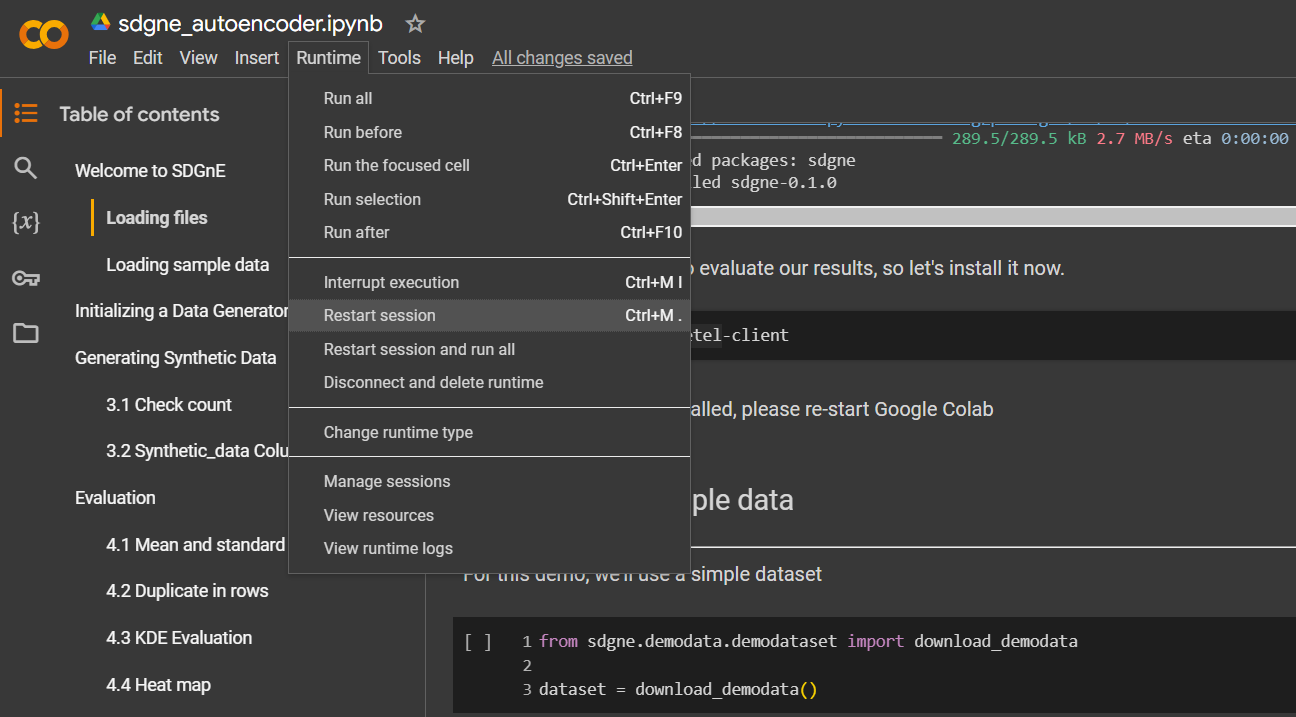

# 1. Loading sample data
---
For this demo, we'll use a simple dataset

In [ ]:
from sdgne.demodata.demodataset import download_demodata

dataset = download_demodata()



*   The dataset consists of 25 rows and 4062 columns.
*   The `class` label is the output label consisting of values 1 or 0
*   In our dataset class label `0` is in minority.



We display the top 5 rows of dataset.

In [ ]:
dataset.head()

,y_am_pef,tempin,humidin,pm25in,co2in,tempdiffin,humidiffin,pm25diffin,pm10,pm25,...,windsd,humid,varp,dewpt,airp,seap,solrhr,solramnt,grdt,class
0,0.284,0.813,0.749,0.291,0.384,0.154,0.396,0.518,0.404,0.173,...,0.226,0.774,0.772,0.906,0.536,0.518,0.311,0.202,0.836,0
1,0.000,0.900,0.820,0.214,0.307,0.169,0.380,0.369,0.436,0.275,...,0.281,0.851,0.832,0.933,0.454,0.437,0.083,0.112,0.815,0
2,0.264,0.807,0.457,0.398,0.184,0.372,0.498,0.447,0.504,0.342,...,0.692,0.430,0.367,0.647,0.646,0.633,0.575,0.235,0.644,1
3,0.475,0.671,0.423,0.397,0.287,0.398,0.649,0.478,0.466,0.306,...,0.190,0.260,0.248,0.544,0.898,0.883,0.746,0.274,0.601,1
4,0.390,0.767,0.557,0.214,0.555,0.287,0.554,0.457,0.397,0.176,...,0.089,0.463,0.428,0.708,0.815,0.796,0.492,0.232,0.710,1


In [ ]:
dataset['class'].value_counts()

1    2925
0    1137
Name: class, dtype: int64

As shown above, class `0` has count of 1137 and is the minority class.

# 2. Initializing a Data Generator
---
In this demo, we would use the `Single Encoder Autoencoder` and the `SMOTE` class from *sdgne.datagenerator* to generate synthetic data.

We instantiate the class using `dataset` , `minority_column_label`, `minority_class_label`

*   minority_column_label:
    *   Column label of the class that you want to generate synthetic data for.

*   minority_class_label:
    *   Indicates the class for which minority data should be generated.

> *Note: For all available algorithms, please refer to the documentation.*



In [ ]:
from sdgne.datagenerator.autoencoder import SingleEncoderAutoencoder
from sdgne.datagenerator.smote import SMOTE

minority_column_label = 'class'
minority_class_label = 0

autoencoder_synthesizer = SingleEncoderAutoencoder(dataset,
                               minority_column_label,
                               minority_class_label
                               )

smote_synthesizer = SMOTE(dataset,
                    minority_column_label,
                    minority_class_label
                    )

# 3. Generating Synthetic Data
---
Now we use the synthesizer object to generate syntehtic data for the minority class and append it to original dataframe.

In [ ]:
autoencoder_synthesized_data = autoencoder_synthesizer.data_generator()
smote_synthesized_data = smote_synthesizer.data_generator()

## 3.1 Check count

After we generate `synthesized_data`, now lets check the class count.

In [ ]:
print(autoencoder_synthesized_data['class'].value_counts())
print(smote_synthesized_data['class'].value_counts())

0    2925
1    2925
Name: class, dtype: int64
0.0    2925
1.0    2925
Name: class, dtype: int64


## 3.2 Saving Dataset

To use the new dataset, you can simply save it as below.

In [ ]:
autoencoder_synthesized_data.to_csv('autoencoder_synthesized_data.csv')
smote_synthesized_data.to_csv('smote_synthesized_data.csv')

# 4. Evaluation
---
We have added few functions to evaluate the quality of synthetic data and provide a comparative study.

The evaluation functions can be invoked by creating an instance of `Evaluation`

In [ ]:
from sdgne.evaluator.evaluator import Evaluation

minority_column_label = 'class'
minority_class_label = 0

autoencoder_evaluator = Evaluation(autoencoder_synthesized_data,
                  minority_column_label,
                  minority_class_label
                  )

smote_evaluator = Evaluation(smote_synthesized_data,
                  minority_column_label,
                  minority_class_label
                  )

## 4.1 Mean and standard deviation

The below function helps us calculate the mean and standard deviation for the real minority and the synthetic minority class. For our algorithm comparasion, we display the averaged (over all columns) standard deviation for the syntehtic minority data calculated for both algorithms.

In [ ]:
autoencoder_stats = autoencoder_evaluator.mean_and_std()
smote_stats = smote_evaluator.mean_and_std()

In [ ]:
autoencoder_std_mean = autoencoder_stats['Std_synthetic_minority_data'].mean()
smote_std_mean = smote_stats['Std_synthetic_minority_data'].mean()

print("Autoencoder average deviation: ", autoencoder_std_mean)
print("SMOTE average deviation:" , smote_std_mean)

Autoencoder average deviation:  0.1932146629079457
SMOTE average deviation: 0.19773821792441557


## 4.2 Percent Change in Mean

Below, we calculate the percentage change in means of original minority data and the synthetic minority data. We calculate this change for both the algorithms.

In [ ]:
autoencoder_mean_original = autoencoder_stats['Mean_original_minority_data'].mean()
autoencoder_mean_synthetic = autoencoder_stats['Mean_synthetic_minority_data'].mean()
autoencoder_percent_change = ((autoencoder_mean_synthetic - autoencoder_mean_original) / autoencoder_mean_original) * 100

smote_mean_original = smote_stats['Mean_original_minority_data'].mean()
smote_mean_synthetic = smote_stats['Mean_synthetic_minority_data'].mean()
smote_percent_change = ((smote_mean_synthetic - smote_mean_original) / smote_mean_original) * 100

print("% Change in Means of Original minority data and Means of Synthetic minority data ")
print(" Autoencoder: ", autoencoder_percent_change)
print(" SMOTE: ", smote_percent_change)

% Change in Means of Original minority data and Means of Synthetic minority data 
 Autoencoder:  9.242282955098815
 SMOTE  8.820036020712067


Thus, we can see that the average percentage change of mean for synthethetic data generated for all columns was smaller when we used SMOTE.

## 4.3 Kullback-Leibler (KL) divergence

 Kullback-Leibler (KL) divergence is a measure of how one probability distribution diverges from a second, expected probability distribution. In simple terms, it quantifies the difference between two probability distributions.

In [ ]:
autoencoder_plot, autoencoder_column_details, autoencoder_total_highlighted_area, autoencoder_total_kl_divergence, autoencoder_average_kl_divergence = autoencoder_evaluator.plot_kde_density_graph()
smote_plot, smote_column_details, smote_total_highlighted_area, smote_total_kl_divergence, smote_average_kl_divergence = smote_evaluator.plot_kde_density_graph()

Displaying Total KL Divergence

In [ ]:
print("Autoencoder Totak KL Divergence: ", autoencoder_total_kl_divergence)
print("SMOTE Totak KL Divergence: ", smote_total_kl_divergence)

Autoencoder Totak KL Divergence:  1.0398472373027963
SMOTE Totak KL Divergence:  0.11876861346951739


Displaying the average KL divergence for each algorithm calculated over all columns.

In [ ]:
print("Autoencoder Average KL Divergence: ", autoencoder_average_kl_divergence)
print("SMOTE Average KL Divergence: ", smote_average_kl_divergence)

Autoencoder Average KL Divergence:  0.04332696822094984
SMOTE Average KL Divergence:  0.004948692227896558


## 4.4 Gretel Evaluation

Gretel is a online platform to genereate synthetic data using different algorithms. They also provide an easy to use evalaution metrics. We use the gretel score as an additional evaluation metrics.

Please refer to: [gretel.ai](https://gretel.ai/evaluate)



In [ ]:
from sdgne.evaluator.evaluator import GretelEvaluation

To calculate `raw_score` and the `grade` of the synthetic dataset, you'd need to get the GRETEL_API_KEY. Which you can get from [here.](https://console.gretel.ai/users/me/key)

In [ ]:
GRETEL_API_KEY = 'GRETEL_API_KEY'
autoencoder_gretel_evaluator = GretelEvaluation(autoencoder_synthesized_data,
                        minority_column_label,
                        minority_class_label,
                        GRETEL_API_KEY)

smorte_gretel_evaluator = GretelEvaluation(smote_synthesized_data,
                        minority_column_label,
                        minority_class_label,
                        GRETEL_API_KEY)

We run the `run_gretel_quality_report` function that returns the Gretel_report

In [ ]:
autoencoder_gretel_score = autoencoder_gretel_evaluator.run_gretel_quality_report()
smorte_gretel_score = smorte_gretel_evaluator.run_gretel_quality_report()

print(autoencoder_gretel_score['Acknowledgement'])
print("Autoencoder Gretel Score: ",autoencoder_gretel_score['Gretel_report'] )
print("SMOTE Gretel Score: ", smorte_gretel_score['Gretel_report'])

This is a quality report for the synthetic data generated by Gretel AI. Please refer to https://gretel.ai/ for complete documentation
Autoencoder Gretel Score:  {'raw_score': 83.89629629629628, 'grade': 'Excellent', 'score': 83}
SMOTE Gretel Score:  {'raw_score': 92.57777777777777, 'grade': 'Excellent', 'score': 92}


# 5. Acknowledgement
---
- Chawla, N.V., Bowyer, K.W., Hall, L.O., Kegelmeyer, W.P.: SMOTE: synthetic minority over-sampling technique. Journal of artificial intelligence research 16, 321–357 (2002)

- Lee, H., Kim, J., Kim, S.: Gaussian-based smote algorithm for solving skewed class distributions. International Journal of Fuzzy Logic and Intelligent Systems 17(4),229–234 (2017)

- Kamalov, F., Denisov, D.: Gamma distribution-based sampling for imbalanced data. Knowledge-Based Systems 207, 106368 (2020)

- Wan, Q., Deng, X., Li, M., Yang, H.: SDDSMOTE: Synthetic minority oversampling technique based on sample density distribution for enhanced classification on imbalanced microarray data. In: The 6th International Conf. on Compute and Data Analysis. pp. 35–42 (2022)

- Bae, W.D., Alfonso, A., Stanko, D., Hao, L., Le, L., Horak, M.: Improving classification performance on rare events in data starved medical applications. In: 2023 IEEE International Symposium on Medical Measurements and Applications (MeMeA). pp. 1–6. IEEE (2023)

- Xu, L., Skoularidou, M., Cuesta-Infante, A., Veeramachaneni, K.: Modeling tabular data using conditional GAN. Advances in neural information processing systems 32 (2019)

- Baldi, Pierre. Autoencoders, unsupervised learning, and deep architectures. Proceedings of ICML workshop on unsupervised and transfer learning. JMLR Workshop and Conference Proceedings (2012)

- Delgado, Juan Manuel Davila, and Lukumon Oyedele. "Deep learning with small datasets: using autoencoders to address limited datasets in construction management." Applied Soft Computing 112 (2021)

- Gretel AI, Gretel Labs, accessed 28 January 2024, https://gretel.ai/.


*   For more detals, please refer the documentation at:
